my expectation toward the entangement of two qubit according to the calculation should be:

"00" = 1/(2^1/2) 

"01" = 0 

"10" = 0 

"11" = 1/(2^1/2)

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


{'11': 539, '00': 485}


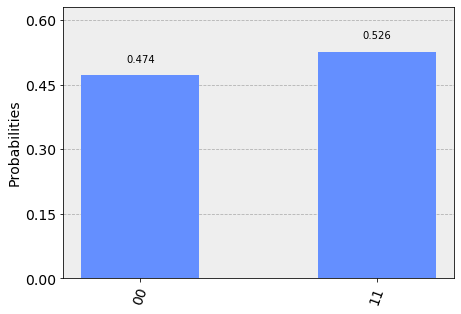

In [10]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from matplotlib import pyplot as plt
import numpy as np
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

def circ(N):
    q = QuantumRegister(N)
    c = ClassicalRegister(N)
    qc = QuantumCircuit(q,c)
    qc.measure(q,c)
    return qc
#cir
q = QuantumRegister(2)
c = ClassicalRegister(2)
qc = QuantumCircuit(q,c)
qc.h(q[0])
qc.cx(q[0],q[1])
qc.measure(q,c)

IBMQ.backends()
#simulator
d = Aer.get_backend('qasm_simulator')
j = execute(qc,d,shots = 1024)

print(j.result().get_counts(qc))
plot_histogram(j.result().get_counts(qc))

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:595: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


{'01': 29, '10': 22, '11': 442, '00': 531}


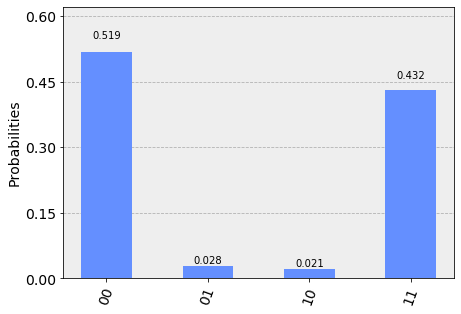

In [12]:
#IBM real 
ib = IBMQ.get_backend('ibmq_vigo')
j1 = execute(qc,ib,shots = 1024)

print(j1.result().get_counts(qc))
plot_histogram(j1.result().get_counts(qc))


{'1': 501, '0': 523}


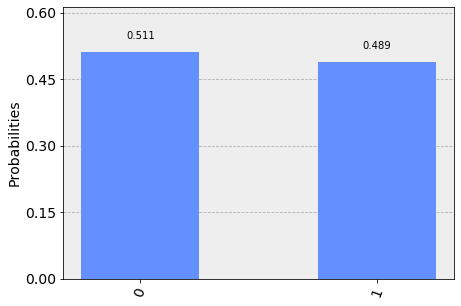

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import numpy as np
from qiskit import QuantumRegister,ClassicalRegister
from qiskit.tools.monitor import job_monitor,backend_monitor,backend_overview
from qiskit.tools.visualization import plot_histogram
from matplotlib import pyplot as plt

q = QuantumRegister(1)

Q = ClassicalRegister(1)

cir = QuantumCircuit(q,Q)

cir.h(q)

cir.measure(q,Q)

cir.draw()
#simulator
D = Aer.get_backend('qasm_simulator')

prob = execute(cir,D,shots = 1024)

print(prob.result().get_counts(cir))
plot_histogram(prob.result().get_counts(cir))


/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:548: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)
/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:595: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


{'1': 436, '0': 588}


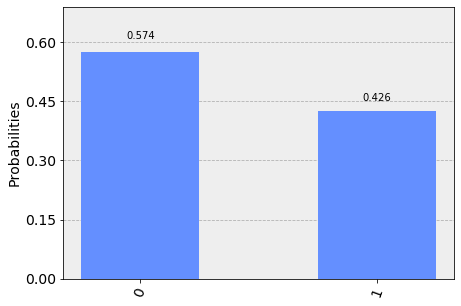

In [2]:
#IBM real machine
IBMQ.backends()

ibm = IBMQ.get_backend('ibmq_vigo')
proba = execute(cir,ibm,shots = 1024)
print(proba.result().get_counts(cir))
plot_histogram(proba.result().get_counts(cir))

